<a href="https://colab.research.google.com/github/arkeodev/pytorch/blob/main/Transfer_Learning/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\begin{array}{c}
\text{$\Large If\ I\ have\ seen\ further;\ it\ is\ by\ standing\ on\ the\ shoulders\ of\ Giants.$} \\
{\text{{$\small Isaac\ Newton$}}} \\
\end{array}
$$

# Unlocking the Power of Pretrained Models with PyTorch Transfer Learning

In the machine learning and deep learning, building a model from scratch to solve complex problems can be a daunting task. It requires substantial data, immense computational resources, and considerable time. However, what if you could stand on the shoulders of giants and leverage what has already been learned? This is where transfer learning offering a shortcut to advanced deep learning capabilities.

## Types of Learning

<figure>
    <img src="https://raw.githubusercontent.com/arkeodev/pytorch-tutorial/main/Transfer_Learning/images/different_types_of_learning.png" width="800" height="500" alt="Types of Learning">
    <figcaption>Types of Learning</figcaption>
</figure>

### (a) Original Model


The original model, typically a neural network, has been trained on a set of tasks (e.g., task 1 to task m). This model serves as a starting point and has a set of parameters $\theta_s$ for shared layers and $\theta_o$ for task-specific layers.

### (b) Fine-tuning


Fine-tuning involves taking a pre-trained model (on one or more tasks) and continuing the training process to adapt the model to a new task. Here, the shared layers may be frozen or continue to learn at a lower rate (shown in blue), while the new task-specific layers (shown in orange) are trained from scratch or fine-tuned at a higher rate.

### (c) Feature Extraction


Feature extraction keeps the pre-trained layers unchanged and only trains a new set of layers for the new task. The shared layers act as a fixed feature extractor, and only the parameters for the new task are learned (orange part), often using a shallower network than the original.

### (d) Joint Training


Joint training simultaneously trains the model on the original tasks and the new task. This approach can help prevent catastrophic forgetting by ensuring that the model does not lose its performance on the original tasks while learning the new one.

### (e) Learning without Forgetting


This method seeks to train the model on a new task while retaining its performance on the previous tasks. It involves a mechanism that preserves the model's responses for the old tasks while learning the new task, typically by using knowledge distillation or a similar approach to retain the original model's output distributions.

Each approach has its advantages and trade-offs. Fine-tuning and feature extraction are common strategies when you have limited data for the new task. Joint training and learning without forgetting are more sophisticated strategies that seek to maintain or improve performance across all tasks.


## Introduction to Transfer Learning

Transfer learning is akin to learning a new skill with the knowledge you already possess. It involves taking a model trained on one task and repurposing it for another related task. This method is not only efficient but also reduces the need for a large dataset, which is often a bottleneck in machine learning projects.


### Why Transfer Learning?

- **Efficiency**: Jumpstart your project by leveraging existing models that have already learned robust features from large datasets.
- **Performance**: Pretrained models often yield surprisingly good results, even with a relatively small amount of data.

## Pre-trained Model Sources

Here're the some sources that the pretrained models can be found:

| Location | Link(s) |
|----------|---------|
| PyTorch domain libraries | [torchvision.models](https://pytorch.org/vision/stable/models.html), [torchtext.models](https://pytorch.org/text/stable/models.html), [torchaudio.models](https://pytorch.org/audio/stable/models.html), [torchrec.models](https://pytorch.org/torchrec/stable/models.html) |
| HuggingFace Hub | [https://huggingface.co/models](https://huggingface.co/models), [https://huggingface.co/datasets](https://huggingface.co/datasets) |
| timm (PyTorch Image Models) library | [https://github.com/rwightman/pytorch-image-models](https://github.com/rwightman/pytorch-image-models) |
| Paperswithcode | [https://paperswithcode.com/](https://paperswithcode.com/) |

### Which Pretrained Model to be Used?

It depends on the problem/the device you're working with.

The higher number in the model name (e.g. efficientnet_b0() -> efficientnet_b1() -> efficientnet_b7()) means better performance but a larger model.

Definitely better performance is better, but some better performing models are too big for some devices.

For example, let's say we should run our model on a mobile-device, then we have to take into account the limited compute resources on the device, thus we'd be looking for a smaller model.

Understanding this performance vs. speed vs. size tradeoff will come with time and practice.

## Transfer Learning with PyTorch's Updated API



PyTorch's TorchVision library provides a plethora of models for tasks including image classification, segmentation, and object detection. However, the conventional API posed several limitations.

### Limitations of the Current API

While TorchVision's `torchvision.models` offers a great starting point for transfer learning, it comes with limitations:

- **Limited Pre-trained Weight Options**: The binary nature of the `pretrained` parameter restricts models to a single set of weights, impeding the adoption of improved or alternative pre-trained weights.
- **Manual Inference Transform Definition**: Users must manually specify the preprocessing steps necessary for model inference, which can be error-prone and reduce model accuracy if done incorrectly.
- **Lack of Metadata**: Essential information regarding the weights, such as category labels and training recipes, is not readily accessible, complicating model utilization and experimentation.

### Introducing the Prototype API

TorchVision addresses these challenges with a new prototype API, enhancing usability and flexibility. Let's explore the improvements offered by this API.

### Step-by-Step Implementation with the New API

In [1]:
import requests
from PIL import Image
from io import BytesIO
from torchvision import models as PM
from torchvision.transforms.functional import to_pil_image

# Fetch the image from the URL
url = "https://raw.githubusercontent.com/arkeodev/pytorch-tutorial/main/Transfer_Learning/images/istanbul.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Initialize the model with pre-defined weights
weights = PM.ResNet50_Weights.IMAGENET1K_V1
model = PM.resnet50(weights=weights)
model.eval()

# Initialize the inference transforms
preprocess = weights.transforms()

# Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"Category: '{category_name}' \nScore {100 * score:.2f}%")

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 82.8MB/s]


Category: 'seashore' 
Score 31.20%


This approach simplifies model usage while addressing previous limitations.

### Features of the New API

- **Multi-Weight Support**: By associating each model with an Enum class (e.g., `ResNet50_Weights`), the API now supports multiple sets of pre-trained weights.
  
- **Integrated Metadata and Preprocessing Transforms**: Each set of weights is linked with its corresponding metadata and preprocessing transforms, streamlining the model inference process.

### Utilizing Different Weights

Here's how to use the API to select from different available weights:

In [2]:
from torchvision.models import resnet50, ResNet50_Weights

# Using different sets of pre-trained weights
model_a = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)  # Old weights
model_b = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)  # Improved weights
model_c = resnet50(weights=ResNet50_Weights.DEFAULT)        # Best available weights
model_d = resnet50(weights=None)                            # No weights, random initialization

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 98.9MB/s]


### Accessing Metadata and Preprocessing Transforms

The API makes it easy to access essential metadata and initialize the necessary preprocessing transforms for your data:

In [3]:
from torchvision import models

# Initialize model with pre-defined weights
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
model.eval()

# Access metadata
metadata = models.ResNet50_Weights.IMAGENET1K_V2.meta

# Print metadata in a formatted manner
print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")


Metadata:
min_size: (1, 1)
categories: ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea 

### Retrieving Weights by Name

For situations where only the name of the weights is known, the API provides a convenient retrieval method:

In [4]:
from torchvision.models import get_weight

# Retrieving weights by name
weights = get_weight("ResNet50_Weights.IMAGENET1K_V1")

## Implementing Transfer Learning with PyTorch

This guide and explanation of the Transfer Learning draws extensively from "Zero to Mastery Learn PyTorch for Deep Learning" by Daniel Bourke. It serves as an invaluable resource for understanding and implementing the Transformer model.

Here I'll be using `hymenoptera_data` different from the implementation of the Transfer Learning in the annotated article above.

Implementing transfer learning in PyTorch involves a few key steps:

1. Load and prepare the data
2. Loading a pre-trained model.
3. Modifying the model for a new task.
4. Training the model on the new task.
5. Evaluating the model and making predictions.

Let's go through each step one-by-one.

### Step 0: Prepare the Environment

Let's import the required packages

In [9]:
import torch
import torch.nn as nn

import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision import models, transforms
from torchvision.datasets import ImageFolder

import os
import zipfile
import shutil

import matplotlib.pyplot as plt
import numpy as np

Set the device globally

In [10]:
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the device globally
torch.set_default_device(device)

### Step 1: Load and Prepare the Data

Download the data and prepare the folders.

In [11]:
# Define the path for the dataset
dataset_url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
dataset_filename = dataset_url.split("/")[-1]
dataset_foldername = dataset_filename.split(".")[0]

# Define the paths for extraction
extract_train_path = "./data/hymenoptera_data/train"
extract_test_path = "./data/hymenoptera_data/val"

# Download the dataset using wget (bash command)
!wget {dataset_url} -P ./data/

# Unzip the dataset
with zipfile.ZipFile(f"./data/{dataset_filename}", 'r') as zip_ref:
    zip_ref.extractall("./data/")


--2024-04-05 13:03:55--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.164.154.123, 18.164.154.17, 18.164.154.30, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.164.154.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘./data/hymenoptera_data.zip.1’

hymenoptera_data.zi 100%[===================>]  45.10M   262MB/s    in 0.2s    

2024-04-05 13:03:55 (262 MB/s) - ‘./data/hymenoptera_data.zip.1’ saved [47286322/47286322]



Set up the data loaders for our dataset using PyTorch's `DataLoader` class.

In [21]:
# Define a transform to preprocess the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the size that the model expects
    transforms.ToTensor(),  # Convert the images to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize for the pre-trained models
                         std=[0.229, 0.224, 0.225])
])

# Create datasets using ImageFolder
train_dataset = ImageFolder(root=extract_train_path, transform=transform)
test_dataset = ImageFolder(root=extract_test_path, transform=transform)

# Number of classes
classes = train_dataset.classes

# Split the train dataset into train and validation
validation_split = 0.2
split_idx = int(len(train_dataset) * (1 - validation_split))

# Use generator to specify the device explicitly for random splitting
generator = torch.Generator(device=device).manual_seed(42)
sub_train_dataset, validation_dataset = torch.utils.data.random_split(
    train_dataset, [split_idx, len(train_dataset) - split_idx], generator=generator
)

# Create DataLoaders for our datasets
train_loader = DataLoader(sub_train_dataset, batch_size=32, shuffle=True, generator=generator)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False, generator=generator)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, generator=generator)

# Print details about the datasets
print(f"Number of training images: {len(train_dataset)}")
print(f"Number of validation images: {len(validation_dataset)}")
print(f"Number of test images: {len(test_dataset)}")
print(f"Number of classes: {len(classes)}")
print(f"Class names: {classes}")

Number of training images: 244
Number of validation images: 49
Number of test images: 153
Number of classes: 2
Class names: ['ants', 'bees']


Visualise data

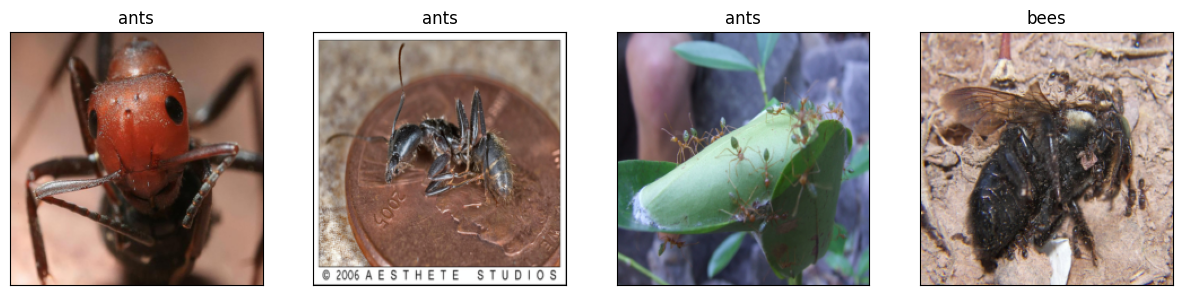

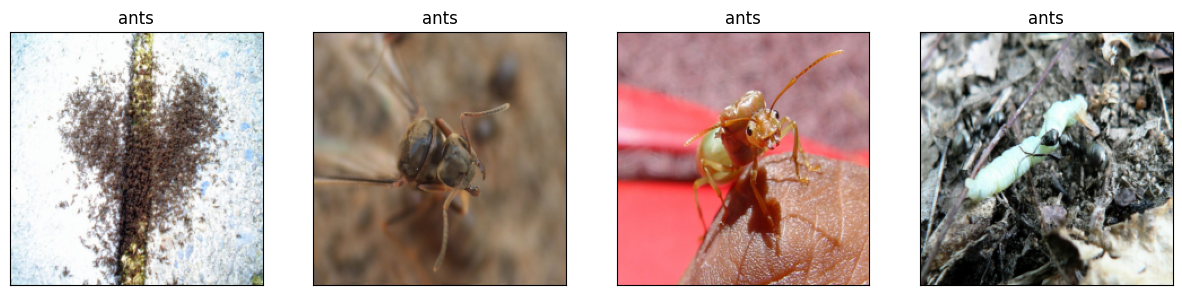

In [22]:
# Function to show images
def show_images(images, labels, class_names):
    plt.figure(figsize=(15, 10))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1, xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0, 1)
        plt.imshow(image)
        plt.title(class_names[labels[i]])
    plt.show()

# Get sample images
sample_train_images = next(iter(train_loader))
sample_test_images = next(iter(test_loader))

# Show images
show_images(sample_train_images[0][:4], sample_train_images[1][:4], train_dataset.classes)
show_images(sample_test_images[0][:4], sample_test_images[1][:4], test_dataset.classes)

### Step 2: Load the Pre-trained Model

In [23]:
# Load the pre-trained model
weights = models.EfficientNet_B0_Weights.DEFAULT
model = models.efficientnet_b0(weights=weights)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 138MB/s]


Print the model summary

In [24]:
! pip install torchinfo

In [25]:
import torchinfo

# Print a summary using torchinfo (uncomment for actual output)
torchinfo.summary(model=model,
        input_size=(32, 3, 224, 224),
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

### Step 3: Modify a Pre-Trained Model

Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False

In [26]:
# Freeze the feature extractor layers
for param in model.features.parameters():
    param.requires_grad = False

Next, we'll modify the pre-trained model's classifier to fit our new task. Let's adjust the output layers (also called head/classifier layers) to suit your needs.

In [27]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate the classifier layer
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=len(classes), # same number of output units as our number of classes
                    bias=True))

Let's visualise the model's parameters once more.

In [28]:
# Print a summary using torchinfo
torchinfo.summary(model=model,
        input_size=(32, 3, 224, 224),
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 2]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

### Step 4: Train the Model

Let's define the train step function

In [33]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

Let's define the test step function

In [34]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

Train and test loops

In [35]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

Start training

In [36]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
no_epochs = 100

# Create the loss function
loss_fn = nn.CrossEntropyLoss()

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_results = train(model=model,
                        train_dataloader=train_loader,
                        test_dataloader=validation_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=no_epochs)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6509 | train_acc: 0.6190 | test_loss: 0.4985 | test_acc: 0.8805
Epoch: 2 | train_loss: 0.5030 | train_acc: 0.7961 | test_loss: 0.3941 | test_acc: 0.9550
Epoch: 3 | train_loss: 0.4452 | train_acc: 0.8929 | test_loss: 0.3526 | test_acc: 0.9550
Epoch: 4 | train_loss: 0.4040 | train_acc: 0.8586 | test_loss: 0.3313 | test_acc: 0.9550
Epoch: 5 | train_loss: 0.4619 | train_acc: 0.8289 | test_loss: 0.3071 | test_acc: 0.9550
Epoch: 6 | train_loss: 0.3092 | train_acc: 0.9464 | test_loss: 0.2772 | test_acc: 0.9844
Epoch: 7 | train_loss: 0.3672 | train_acc: 0.8899 | test_loss: 0.2725 | test_acc: 0.9688
Epoch: 8 | train_loss: 0.3011 | train_acc: 0.9286 | test_loss: 0.2494 | test_acc: 0.9844
Epoch: 9 | train_loss: 0.2483 | train_acc: 0.9643 | test_loss: 0.2356 | test_acc: 1.0000
Epoch: 10 | train_loss: 0.3134 | train_acc: 0.8259 | test_loss: 0.2406 | test_acc: 1.0000
Epoch: 11 | train_loss: 0.2472 | train_acc: 0.9643 | test_loss: 0.2183 | test_acc: 0.9844
Epoch: 12 | train_l

Let's plot the accuracy and loss keys

In [38]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

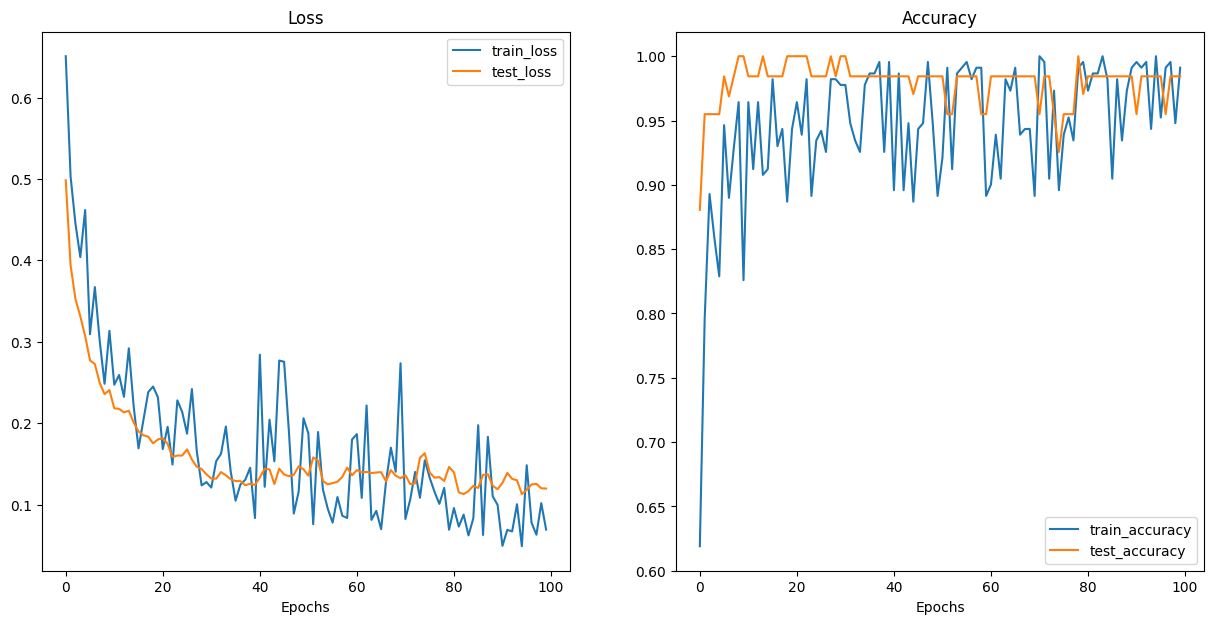

In [43]:
plot_loss_curves(model_results)

### Step 5: Make Predictions on Images from the Test Set

After training, we can evaluate the model on the validation set and make predictions.

In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: transforms = None):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension.
      target_image_pred = model(transformed_image)

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

In [ ]:
# Get a random list of image paths from test set
import random
from pathlib import Path

num_images_to_plot = 3
test_image_path_list = list(Path(extract_test_path).glob("*/*.jpg")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=classes,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

## Conclusion



Transfer learning opens up a realm of possibilities in deep learning projects. By utilizing pretrained models, you can accelerate development, conserve resources, and achieve remarkable results, even with limited data.

Main take-aways:

- Transfer learning often allows to you get good results with a relatively small amount of custom data.
- Knowing the power of transfer learning, it's a good idea to ask at the start of every problem, "does an existing well-performing model exist for my problem?"
- When using a pretrained model, it's important that your custom data be formatted/preprocessed in the same way that the original model was trained on, otherwise you may get degraded performance.

## References

- Li, Zhizhong, and Derek Hoiem. "Learning without forgetting." In European Conference on Computer Vision, pp. 614-629. Springer International Publishing, 2016: https://arxiv.org/pdf/1606.09282.pdf

- Introducing TorchVision’s New Multi-Weight Support API: https://pytorch.org/blog/introducing-torchvision-new-multi-weight-support-api/

- Pytorch transfer learning: https://www.learnpytorch.io/06_pytorch_transfer_learning/